# Short report on the progress

In [ ]:
SELECT TOP 1000
  p.objID, w.cntr,
  p.ra, p.dec,
  w.j_m_2mass, w.h_m_2mass, w.k_m_2mass,
  w.w1mag, w.w2mag, w.w3mag, w.w4mag,
  s.z AS redshift
FROM WISE_xmatch x
  INNER JOIN Galaxy p ON p.objID = x.sdss_objid
  INNER JOIN wise_allsky w ON w.cntr = x.wise_cntr
  INNER JOIN SpecObj s ON s.bestObjID = p.objID
WHERE s.z BETWEEN 0.00000001 AND 0.025 AND class = 'GALAXY' AND  w.w1mag >= 12 A
ND w.j_m_2mass < 9999

Tettem bele egy w1mag vágást 12 magnitúdó fölé, amit Andrásék is csináltak. Továbbá z-nek adtam egy minimális értéket, hogy csak olyan objektumokat vizsgáljak, aminek van z-je. Ezek után megnéztem, hogy hány darabnak van a tejútrendszer méreténél sokkal kisebb z-je, ez 3 db volt az 1000-ből, ezeknek a következő a koordinátája:<br />
objID	cntr	ra	dec	j_m_2mass	h_m_2mass	k_m_2mass w1mag	w2mag	w3mag	w4mag	redshift<br />
1237651753456238646 1406101501241018114 140.629059662185 1.37061867568553 13.374 13.005 12.805 12.526 12.589 11.586 8.64 7.639447E-05<br />
1237650371562831998 1966001601241009112 196.336916102318 -1.69393298897282 15.69 15.043 15.123 14.701 14.787 13.322 10.881 4.679292E-05<br />
1237648721769594978 1845100001241018128 184.603867781986 0.397063645254232 13.65 3 13.215 13.123 12.957 13.049 11.412 7.823 0.0001317499<br />

Megpróbáltam előtte különböző változók szerint megcsinálni a lekérést, de sajnos amire azt számolták az SDSS-ek, hogy minden szűrőben galaxisnak kellene lennie, azoknak nagy része csillag volt.<br />

A csillagokra a lekérés ugyanaz volt, csak a class-t írtam át STAR-ra. Ezek közül 11 csillagot találtam távolság alapján sorrendbe rakva az objektumokat. Ezek adatai:

objID	cntr	ra	dec	j_m_2mass	h_m_2mass	k_m_2mass w1mag	w2mag	w3mag	w4mag	redshift
1237650369414824015 1951003101241003395 195.157842512094 -3.50172563950905 16.23
4 15.818 14.968 14.091 13.687 10.124 8.309 0.004563184
1237654786779906160 1876107501241031067 187.521141556871 8.0733396137322 15.57 1
5.012 14.748 12.906 12.998 11.874 8.737 0.004153254
1237655126630072488 2081106001241004898 207.92878569526 5.44651317961088 15.339 
15.911 15.541 13.677 13.627 12.222 8.914 0.004153254
1237654604788203544 1579104501241000047 158.566221010073 3.91811876337864 16.19 
15.381 14.877 13.575 13.455 10.648 7.803 0.003930211
1237655126085075097 1898106001241006084 189.279257348669 5.42164775478657 15.569
 15.002 13.968 13.145 13.22 11.791 8.56 0.00389794
1237651274038771829 1380160501241011741 138.268192719521 60.2448930093591 15.38 
14.702 13.679 12.624 12.622 11.778 8.555 0.003779149
1237650762933338181 1936001601241012720 193.507855890576 -1.50833792307156 14.30
6 13.721 13.453 12.276 12.288 10.401 8.372 0.00376161
1237651191354949912 1243146901241011101 124.369556480993 46.6280513945251 15.608
 14.84 14.788 14.363 14.447 12.201 8.324 0.002886976
1237654382516699209 1429154501241035913 143.508473305513 55.2410533687252 16.782
 16.135 16.427 15.02 14.497 11.33 7.887 0.002423319
1237655107829235882 1393149901241027925 139.717477596987 50.1878489950863 16.289
 15.575 14.839 13.353 13.345 11.675 8.435 0.002100987
1237655107830546675 1430151401241029837 143.438770442588 51.9195092425775 16.209
 15.339 14.377 13.353 13.405 11.799 8.245 0.002010877


A csillagok távolságának hisztogramja:

In [4]:
from IPython.display import Image

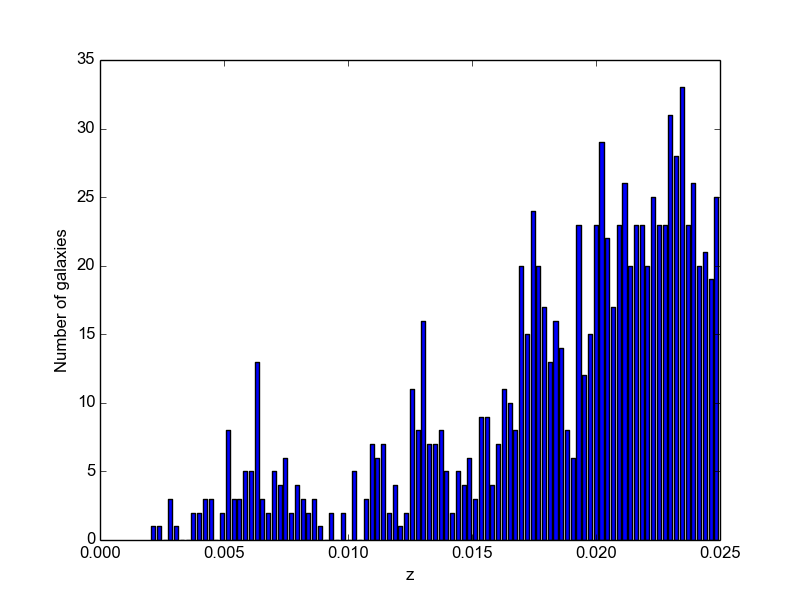

In [5]:
Image(filename='GxHist.png')

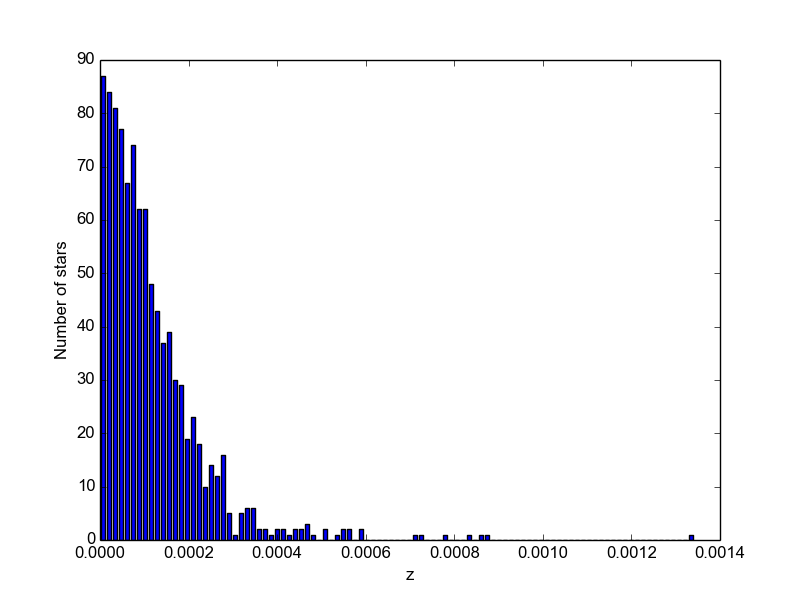

In [6]:
Image(filename='StarHist.png')

Ezek után a következő programmal csináltam meg a színdiagramok ábrázolását:

In [ ]:
#!/usr/bin/env python
import numpy as npy
from numpy import *
import math
import scipy
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from pylab import figure, show


Cut=-1.7
GxFilename = 'DataGx'
StarFilename = 'DataStars'
ColumnOfWise1_Gx = 7
ColumnOf2MASS_Gx = 4
ColumnOfWise1_Star = 7
ColumnOf2MASS_Star = 4
GalaxiesIdentifiedCorrectly, GalaxiesIdentifiedIncorrectly, StarsIdentifiedInCorrectly, StarsIdentifiedCorrectly = 0,0,0,0


def graph(x1todo, y1todo, x2todo, y2todo):  
	plt.xlabel('W1-J')
	plt.ylabel('W1') 
	
	
#	line1 = matplotlib.lines.Line2D(range(1), range(1), color="white", marker='o', markerfacecolor="red")
#	plt.legend((line1),('Thing 1'),numpoints=1, loc=1)

#	plt.legend(["ro","bo"], ["Galaxies", "Stars"])
	x1 = npy.array(x1todo)  
	x2 = npy.array(x2todo)  
	y1 = npy.array(y1todo)  
	y2 = npy.array(y2todo)
	
#	line_up, = plt.plot(x1,y1, label='Line 2')
#	line_down, = plt.plot(x2,y2, label='Line 1')
#	plt.legend([line_up, line_down], ['Line Up', 'Line Down'])

	plt.plot(x1, y1, 'ro', x2, y2, 'bo')  
	plt.show()

#Open data of galaxies
DataGalaxies = genfromtxt(GxFilename)
N = len(DataGalaxies)
W1 = []
J = []

for i in range(N):
	W1.append(DataGalaxies[i][ColumnOfWise1_Gx])
	J.append(DataGalaxies[i][ColumnOf2MASS_Gx])

#Open data of NOT galaxies
DataStar = genfromtxt(StarFilename)
N2 = len(DataStar)
W1_Star = []
J_Star = []

for j in range(N2):
	W1_Star.append(DataStar[j][ColumnOfWise1_Star])
	J_Star.append(DataStar[j][ColumnOf2MASS_Star])

##### Calculate effectivity
W1_num = [float(x) for x in W1]
J_num = [float(x) for x in J]
W1_Star_num = [float(x) for x in W1_Star]
J_Star_num = [float(x) for x in J_Star]

DifferenceGx = [x - y for x, y in zip(W1_num, J_num)]
DifferenceStars = [x - y for x, y in zip(W1_Star_num, J_Star_num)]

for i in range(N):
	if DifferenceGx[i] <= Cut:
		GalaxiesIdentifiedCorrectly += 1
	else:
		GalaxiesIdentifiedIncorrectly += 1

for i in range(N2):
	if DifferenceStars[i] <= Cut:
		StarsIdentifiedInCorrectly += 1
	else:
		StarsIdentifiedCorrectly += 1

print 'The % of galaxies identified correctly',100*GalaxiesIdentifiedCorrectly/(GalaxiesIdentifiedCorrectly+GalaxiesIdentifiedIncorrectly),'%'
print 'Star contamination:',100*StarsIdentifiedInCorrectly/(StarsIdentifiedInCorrectly+GalaxiesIdentifiedCorrectly),'%'

### PLOT
graph(DifferenceGx, W1_num, DifferenceStars, W1_Star_num)


A fentebbi mintákra megcsináltam 